# Laborator 9

## Modele de regresie

Folositi urmatoarele seturi de date:
1. [CPU Computer Hardware](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware); excludeti din dataset coloanele: vendor name, model name, estimated relative performance; se va estima coloana "published relative performance".
1. [Boston Housing](http://archive.ics.uci.edu/ml/machine-learning-databases/housing/)
1. [Wisconsin Breast Cancer](http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html); cautati in panelul din stanga Wisconsin Breast Cancer si urmati pasii din "My personal Notes"
1. [Communities and Crime](http://archive.ics.uci.edu/ml/datasets/communities+and+crime); stergeti primele 5 dimensiuni si trasaturile cu missing values.

Pentru fiecare set de date aplicati minim 5 modele de regresie din scikit learn. Pentru fiecare raportati: mean absolute error, mean squared error, median absolute error - a se vedea [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) - folosind 5 fold cross validation. Valorile hiperparametrilor trebuie cautate cu grid search (cv=3)  si random search (n_iter dat de voi). Metrica folosita pentru cautarea hiperparametrilor va fi mean squared error. Raportati mediile rezultatelor atat pentru fold-urile de antrenare, cat si pentru cele de testare; indicatie: puteti folosi metoda `cross_validate` cu parametrul `return_train_score=True`, iar ca model un obiect de tip `GridSearchCV` sau `RandomizedSearchCV`.

Rezultatele vor fi trecute intr-un dataframe. Intr-o stare intermediara, valorile vor fi calculate cu semnul minus: din motive de implementare, biblioteca sklearn transforma scorurile in numere negative; a se vedea imaginea de mai jos:

![intermediate report](./images/cpu_intermediate_blurred.png)


Valorile vor fi aduse la interval pozitiv, apoi vor fi marcate cele maxime si minime; orientativ, se poate folosi imaginea de mai jos, reprezentand dataframe afisat in notebook; puteti folosi alte variante de styling pe dataframe precum la https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#.  

Se va crea un raport final in format HTML sau PDF - fisier(e) separat(e). Raportul trebuie sa contina minimal: numele setului de date si obiectul dataframe; preferabil sa se pastreze marcajul de culori realizat in notebook.

![report](./images/cpu_results_blurred.png)

Notare:
1. Se acorda 20 de puncte din oficiu.
1. Optimizare si cuantificare de performanta a modelelor: 3 puncte pentru fiecare combinatie set de date + model = 60 de puncte
1. Documentare modele: numar modele * 2 puncte = 10 puncte. Documentati in jupyter notebook fiecare din modelele folosite, in limba romana. Puteti face o sectiune separata cu documentarea algoritmilor. Fiecare model trebuie sa aiba o descriere de minim 20 de randuri, minim o imagine asociata si minim 2 referinte bibliografice.
1. 10 puncte: export in format HTML sau PDF.



*Notare:* rezolvarea va fi incarcata pe platforma de elearning in saptamana 11-15 mai.

In [62]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image 
from reportlab.pdfgen import canvas

# BaggingRegressor

class sklearn.ensemble.BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0,
 max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
 n_jobs=None, random_state=None, verbose=0)


Un "BaggingRegressor" este un meta-estimator de ansamblu care se potrivește regresorilor
de bază fiecare pe subseturi aleatorii ale setului de date inițial și apoi își adună predicțiile individuale
(fie prin vot, fie prin medie) pentru a forma o predicție finală.
Un astfel de meta-estimator poate fi utilizat de obicei ca o modalitate de a reduce variația unui estimator
de cutie neagră (de exemplu, un arbore de decizie), prin introducerea aleatoriei în procedura de construcție
a acesteia și apoi formarea unui ansamblu din ea.
Acest algoritm cuprinde mai multe lucrări din literatura de specialitate.
Când subseturile aleatoare ale setului de date sunt desenate ca subseturi aleatorii ale eșantioanelor,
acest algoritm este cunoscut sub numele de Lipire [R4d113ba76fc0-1]. Dacă probele sunt prelevate cu înlocuire,
atunci metoda este cunoscută sub numele de Bagging [R4d113ba76fc0-2]. Când subseturile aleatorii ale setului de date
sunt desenate ca subseturi aleatorii ale caracteristicilor, atunci metoda este cunoscută sub
denumirea de Subspații aleatorii [R4d113ba76fc0-3]. În cele din urmă, când estimatorii de bază sunt construiți
pe subseturi atât de probe, cât și de caracteristici, atunci metoda este cunoscută
sub numele de Random Patches [R4d113ba76fc0-4].



Parametrii:

   1.base_estimator:object or None, optional (default=None)
     Estimatorul de bază să se încadreze pe subseturi aleatorii ale setului de date.
     Dacă este None, atunci estimatorul de bază este un arbore de decizie.
     
   2.n_estimators:int, optional (default=10)
     Numărul estimatorilor de bază din ansamblu.
     
   3.max_samples:int or float, optional (default=1.0)
     Numărul de eșantioane de extras de la X pentru a antrena fiecare estimator de bază.
     
   4.max_features:int or float, optional (default=1.0)
     Numărul de caracteristici de la X pentru a antrena fiecare estimator de bază.
     
   5.bootstrap:boolean, optional (default=True)
     Dacă probele sunt prelevate cu cele înlocuite.
     Dacă este fals, se efectuează eșantionarea fără înlocuire.
     
   6.bootstrap_features:boolean, optional (default=False)
     Dacă caracteristicile sunt desenate cu înlocuirea.
     
   7.oob_score:bool
     Indiferent dacă folosiți eșantioane fără bagaj pentru a estima eroarea de generalizare.
     
   8.warm_start:bool, optional (default=False)
     Când este setat pe True, reutilizați soluția apelului anterior pentru a se potrivi și adăuga mai mulți estimatori la ansamblu,
     în caz contrar, trebuie doar să încadrați un ansamblu cu totul nou.
     
   9.n_jobs:int or None, optional (default=None)
     Numărul de locuri care vor fi executate în paralel, atât pentru potrivire cât și pentru previziune.
     
   10.random_state:int, RandomState instance or None, optional (default=None)
     Dacă este int, random_state este semința folosită de generatorul de numere aleatoare;
     Dacă este instanța RandomState, random_state este generatorul de numere aleatorii;
     Dacă este None, generatorul de numere aleatorii este instanța RandomState folosită de np.random.
     
   11.verbose:int, optional (default=0)
     Controlează verbositatea atunci când se potrivește și prezice.


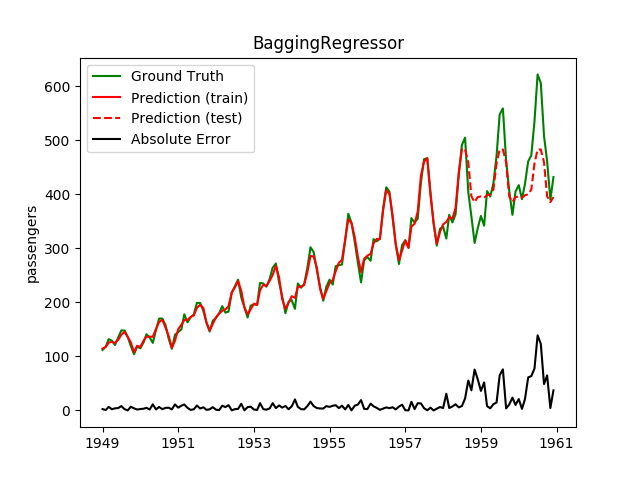

In [53]:
img = Image.open('BaggingRegressor.png')   
img

Referinte bibliografice : 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
                          
Breiman, "Pasting small votes for classification in large databases and on-line", Machine Learning, 36(1), 85-103, 1999.

L. Breiman, "Bagging predictors", Machine Learning, 24(2), 123-140, 1996.

T. Ho, "The random subspace method for constructing decision forests", Pattern Analysis and Machine Intelligence, 20(8), 832-844, 1998.

G. Louppe and P. Geurts, "Ensembles on Random Patches", Machine Learning and Knowledge Discovery in Databases, 346-361, 2012.


## BaggingRegressor GridSearchCV

In [2]:
def BR_grid(X,y):
    parameter_grid={"n_estimators":[10,20]}
    scores_neg_mean_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = BaggingRegressor(), 
            param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_grid = cross_validate(estimator=GridSearchCV(estimator = BaggingRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = BaggingRegressor(), 
    param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    BaggingRegressor_fit_time_gd=np.array([scores_neg_mean_absolute_error_grid["fit_time"].mean(),scores_neg_mean_squared_error_grid["fit_time"].mean(),
              scores_neg_median_absolute_error_grid["fit_time"].mean()])
    BaggingRegressor_score_time_gd=np.array([scores_neg_mean_absolute_error_grid["score_time"].mean(),scores_neg_mean_squared_error_grid["score_time"].mean()
                ,scores_neg_median_absolute_error_grid["score_time"].mean()])

    BaggingRegressor_grid=np.array([scores_neg_mean_absolute_error_grid["test_score"].mean(),scores_neg_mean_squared_error_grid["test_score"].mean(),
      scores_neg_median_absolute_error_grid["test_score"].mean(),scores_neg_mean_absolute_error_grid["train_score"].mean(),
      scores_neg_mean_squared_error_grid["train_score"].mean(),scores_neg_median_absolute_error_grid["train_score"].mean(),
          np.mean(BaggingRegressor_fit_time_gd),np.mean(BaggingRegressor_score_time_gd)])
    return BaggingRegressor_grid

## BaggingRegressor RandomizedSearchCV

In [3]:
def BR_random(X,y):
    parameter_grid={"n_estimators":[10,20]}
    scores_neg_mean_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = BaggingRegressor(), 
            param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = BaggingRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = BaggingRegressor(), 
    param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    BaggingRegressor_fit_time_random=np.array([scores_neg_mean_absolute_error_random["fit_time"].mean(),scores_neg_mean_squared_error_random["fit_time"].mean(),
              scores_neg_median_absolute_error_random["fit_time"].mean()])
    BaggingRegressor_score_time_random=np.array([scores_neg_mean_absolute_error_random["score_time"].mean(),scores_neg_mean_squared_error_random["score_time"].mean()
                ,scores_neg_median_absolute_error_random["score_time"].mean()])

    BaggingRegressor_random=np.array([scores_neg_mean_absolute_error_random["test_score"].mean(),scores_neg_mean_squared_error_random["test_score"].mean(),
      scores_neg_median_absolute_error_random["test_score"].mean(),scores_neg_mean_absolute_error_random["train_score"].mean(),
      scores_neg_mean_squared_error_random["train_score"].mean(),scores_neg_median_absolute_error_random["train_score"].mean(),
          np.mean(BaggingRegressor_fit_time_random),np.mean(BaggingRegressor_score_time_random)])
    return BaggingRegressor_random

# RandomForestRegressor

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,
 n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)


Un "RandomForestRegressor"  este un meta-estimator care se potrivește cu un număr de arbori de decizie
de clasificare pe diverse sub-eșantioane ale setului de date și folosește media pentru a îmbunătăți exactitatea
predictivă și pentru a controla supra-montarea. Mărimea sub-eșantionului este întotdeauna aceeași cu dimensiunea
 inițială a eșantionului de intrare, dar eșantioanele sunt trase cu înlocuire dacă bootstrap = True (implicit).


Parametrii: 

   1.n_estimators:integer, optional (default=10)
     Numărul de arbori din pădure.
     
   2.criterion:string, optional (default=”mse”)
     Funcția de măsurare a calitatii unei împărțiri.
     Criteriile acceptate sunt „mse” pentru eroarea medie pătrată,
     care este egală cu reducerea variației ca criteriu de selecție a caracteristicilor
     și „mae” pentru eroarea absolută medie.
     
   3.max_depth:integer or None, optional (default=None)
     Adâncimea maximă a copacului.
     
   4.min_samples_split:int, float, optional (default=2)
     Numărul minim de eșantioane necesar pentru a împărți un nod intern.
     
   5.min_samples_leaf:int, float, optional (default=1)
     Numărul minim de eșantioane necesar să fie la un nod frunze.
     
   6.min_weight_fraction_leaf:float, optional (default=0.)
     Fracția minimă ponderată din suma totală a greutăților (din toate eșantioanele de intrare)
     necesară pentru a fi la un nod frunză. Probele au o greutate egală atunci când nu este furnizat eșantion_weight.
     
   7.max_features:int, float, string or None, optional (default=”auto”)
     Numărul de caracteristici care trebuie luate în considerare atunci când se cauta cea mai bună divizare.
     
   8.max_leaf_nodes:int or None, optional (default=None)
     Se "cultiva" copaci cu max_leaf_nodes în cel mai bun mod.
     
   9.min_impurity_decrease:float, optional (default=0.)
     Un nod va fi împărțit dacă această scindare induce o scădere a impurității mai mare sau egală cu această valoare.
     
   10.min_impurity_split:float, (default=1e-7)
     Prag pentru oprirea timpurie a creșterii pomilor.
     
   11.bootstrap:boolean, optional (default=True)
     Indiferent dacă se folosesc mostre de bootstrap la construirea copacilor.
     
   12.oob_score:bool, optional (default=False)
     Dacă se folosesc eșantioane fără pungi pentru a estima R ^ 2 pe datele nevăzute.
     
   13.n_jobs:int or None, optional (default=None)
     Numărul de locuri de muncă care vor fi executate în paralel.
     
   14.random_state:int, RandomState instance or None, optional (default=None)
     Controlează atât randomizarea prin demarare a eșantioanelor utilizate la
     construirea copacilor (dacă bootstrap = True), cât și eșantionarea caracteristicilor de luat
     în considerare atunci când căutați cea mai bună împărțire la fiecare nod (dacă max_features <n_features).
     
   15.verbose:int, optional (default=0)
     Controlează verbositatea atunci când se potrivește și prezice.
     
   16.warm_start:bool, optional (default=False)
     Când este setat pe True, reutilizați soluția apelului anterior pentru a se potrivi
     și adăuga mai mulți estimatori la ansamblu, în caz contrar, potriviți doar o pădure cu totul nouă.
     
   17.ccp_alpha:non-negative float, optional (default=0.0)
     Parametrul de complexitate utilizat pentru tăierea minimă a costurilor-complexității.
     
   18.max_samples:int or float, default=None
     Dacă bootstrap-ul este True, numărul de eșantioane de extras de la X pentru a antrena fiecare estimator de bază.

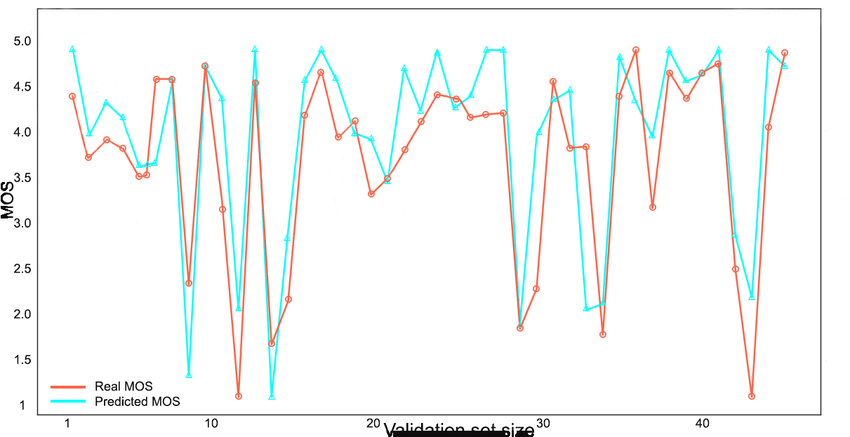

In [54]:
img = Image.open('RandomForestRegressor.png')   
img

Referinte bibliografice : 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## RandomForestRegressor GridSearchCV

In [4]:
def RFR_grid(X,y):
    parameter_grid={"max_depth":[3,5]}
    scores_neg_mean_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = RandomForestRegressor(), 
            param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_grid = cross_validate(estimator=GridSearchCV(estimator = RandomForestRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = RandomForestRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    RandomForestRegressor_fit_time_gd=np.array([scores_neg_mean_absolute_error_grid["fit_time"].mean(),scores_neg_mean_squared_error_grid["fit_time"].mean(),
              scores_neg_median_absolute_error_grid["fit_time"].mean()])
    RandomForestRegressor_score_time_gd=np.array([scores_neg_mean_absolute_error_grid["score_time"].mean(),scores_neg_mean_squared_error_grid["score_time"].mean()
                ,scores_neg_median_absolute_error_grid["score_time"].mean()])

    RandomForestRegressor_grid=np.array([scores_neg_mean_absolute_error_grid["test_score"].mean(),scores_neg_mean_squared_error_grid["test_score"].mean(),
      scores_neg_median_absolute_error_grid["test_score"].mean(),scores_neg_mean_absolute_error_grid["train_score"].mean(),
      scores_neg_mean_squared_error_grid["train_score"].mean(),scores_neg_median_absolute_error_grid["train_score"].mean(),
          np.mean(RandomForestRegressor_fit_time_gd),np.mean(RandomForestRegressor_score_time_gd)])
    return RandomForestRegressor_grid

## RandomForestRegressor RandomizedSearchCV

In [5]:
def RFR_random(X,y):
    parameter_grid={"max_depth":[3,5]}
    scores_neg_mean_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = RandomForestRegressor(), 
            param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = RandomForestRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = RandomForestRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    RandomForestRegressor_fit_time_random=np.array([scores_neg_mean_absolute_error_random["fit_time"].mean(),scores_neg_mean_squared_error_random["fit_time"].mean(),
              scores_neg_median_absolute_error_random["fit_time"].mean()])
    RandomForestRegressor_score_time_random=np.array([scores_neg_mean_absolute_error_random["score_time"].mean(),scores_neg_mean_squared_error_random["score_time"].mean()
                ,scores_neg_median_absolute_error_random["score_time"].mean()])

    RandomForestRegressor_random=np.array([scores_neg_mean_absolute_error_random["test_score"].mean(),scores_neg_mean_squared_error_random["test_score"].mean(),
      scores_neg_median_absolute_error_random["test_score"].mean(),scores_neg_mean_absolute_error_random["train_score"].mean(),
      scores_neg_mean_squared_error_random["train_score"].mean(),scores_neg_median_absolute_error_random["train_score"].mean(),
          np.mean(RandomForestRegressor_fit_time_random),np.mean(RandomForestRegressor_score_time_random)])
    return RandomForestRegressor_random

# DecisionTreeRegressor

class sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
presort='deprecated', ccp_alpha=0.0)


Algoritmul "DecisionTreeRegressor" a devenit unul dintre cei mai folosiți algoritmi de învățare automată
atât în ​​competiții precum Kaggle, cât și în mediul de afaceri. Arborul de decizii poate fi utilizat atât
în ​​problema clasificării, cât și a problemei de regresie.
Arborele decizional poate fi rezumat cu punctele de mai jos:
   -arborii de decizii sunt modele predictive care folosesc un set de reguli binare pentru a calcula o valoare țintă.
   -fiecare copac individual este un model destul de simplu, care are ramuri, noduri și frunze.


Parametrii: 

   1.criterion:{“mse”, “friedman_mse”, “mae”}, default=”mse”  
      Funcția de a măsura calitatea unei împărțiri.
      
   2.splitter:{“best”, “random”}, default=”best”
      Strategia folosită pentru a alege împărțirea la fiecare nod.
      
   3.max_depth:int, default=None     
      Adâncimea maximă a copacului.
      
   4.min_samples_split:int or float, default=2   
      Numărul minim de eșantioane necesar pentru a împărți un nod intern.
      
   5.min_samples_leaf:int or float, default=1
      Numărul minim de eșantioane necesar să fie la un nod frunze.
      
   6.min_weight_fraction_leaf:float, default=0.0
      Fracția minimă ponderată din suma totală a greutăților (din toate eșantioanele de intrare)
      necesară pentru a fi la un nod frunză. Probele au o greutate egală atunci când nu este furnizat eșantion_weight.
      
   7.max_features:int, float or {“auto”, “sqrt”, “log2”}, default=None
      Numărul de caracteristici care trebuie luate în considerare atunci când căutați cea mai bună divizare.
      
   8.random_state:int or RandomState, default=None  
      Dacă este int, random_state este semința folosită de generatorul de numere aleatoare;
      Dacă este instanța RandomState, random_state este generatorul de numere aleatorii;
      Dacă este Null, generatorul de numere aleatorii este instanța RandomState folosită de np.random.
      
   9.max_leaf_nodes:int, default=None 
      Crește un copac cu max_leaf_nodes în cel mai bun mod.
      
   10.min_impurity_decrease:float, default=0.0
      Un nod va fi împărțit dacă această scindare induce o scădere a impurității mai mare sau egală cu această valoare.
      
   11.min_impurity_split:float, (default=1e-7)
      Prag pentru oprirea timpurie a creșterii pomilor.
      
   12.presort:deprecated, default=’deprecated’
      Acest parametru este învechit și va fi eliminat în v0.24.
      
   13.ccp_alpha:non-negative float, default=0.0
      Parametrul de complexitate utilizat pentru tăierea minimă a costurilor-complexității.

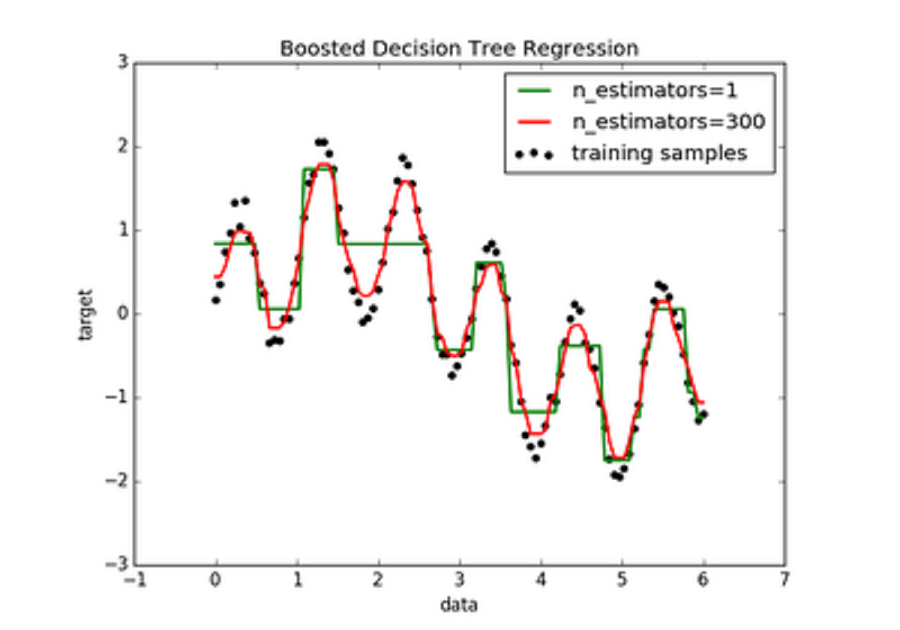

In [59]:
img = Image.open('DecisionTreeRegressor.png')   
img

Referinte bibliografice : 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://gdcoder.com/decision-tree-regressor-explained-in-depth/


## DecisionTreeRegressor  GridSearchCV

In [6]:
def DTR_grid(X,y):
    parameter_grid={"max_depth":[3,5]}
    scores_neg_mean_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = DecisionTreeRegressor(), 
            param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_grid = cross_validate(estimator=GridSearchCV(estimator = DecisionTreeRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = DecisionTreeRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    DecisionTreeRegressor_fit_time_gd=np.array([scores_neg_mean_absolute_error_grid["fit_time"].mean(),scores_neg_mean_squared_error_grid["fit_time"].mean(),
              scores_neg_median_absolute_error_grid["fit_time"].mean()])
    DecisionTreeRegressor_score_time_gd=np.array([scores_neg_mean_absolute_error_grid["score_time"].mean(),scores_neg_mean_squared_error_grid["score_time"].mean()
                ,scores_neg_median_absolute_error_grid["score_time"].mean()])

    DecisionTreeRegressor_grid=np.array([scores_neg_mean_absolute_error_grid["test_score"].mean(),scores_neg_mean_squared_error_grid["test_score"].mean(),
      scores_neg_median_absolute_error_grid["test_score"].mean(),scores_neg_mean_absolute_error_grid["train_score"].mean(),
      scores_neg_mean_squared_error_grid["train_score"].mean(),scores_neg_median_absolute_error_grid["train_score"].mean(),
          np.mean(DecisionTreeRegressor_fit_time_gd),np.mean(DecisionTreeRegressor_score_time_gd)])
    return DecisionTreeRegressor_grid

## DecisionTreeRegressor RandomizedSearchCV

In [7]:
def DTR_random(X,y):
    parameter_grid={"max_depth":[3,5]}
    scores_neg_mean_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = DecisionTreeRegressor(), 
            param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = DecisionTreeRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = DecisionTreeRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    DecisionTreeRegressor_fit_time_random=np.array([scores_neg_mean_absolute_error_random["fit_time"].mean(),scores_neg_mean_squared_error_random["fit_time"].mean(),
              scores_neg_median_absolute_error_random["fit_time"].mean()])
    DecisionTreeRegressor_score_time_random=np.array([scores_neg_mean_absolute_error_random["score_time"].mean(),scores_neg_mean_squared_error_random["score_time"].mean()
                ,scores_neg_median_absolute_error_random["score_time"].mean()])

    DecisionTreeRegressor_random=np.array([scores_neg_mean_absolute_error_random["test_score"].mean(),scores_neg_mean_squared_error_random["test_score"].mean(),
      scores_neg_median_absolute_error_random["test_score"].mean(),scores_neg_mean_absolute_error_random["train_score"].mean(),
      scores_neg_mean_squared_error_random["train_score"].mean(),scores_neg_median_absolute_error_random["train_score"].mean(),
          np.mean(DecisionTreeRegressor_fit_time_random),np.mean(DecisionTreeRegressor_score_time_random)])
    return DecisionTreeRegressor_random

# AdaBoostRegressor

class sklearn.ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0,
loss='linear', random_state=None)

Un "AdaBoostRegressor" este un meta-estimator care începe prin montarea unui regresor pe setul de date inițial
și apoi încadrează copii suplimentare ale regresorului pe același set de date, dar unde ponderile instanțelor
sunt ajustate în funcție de eroarea prezicerii curente. Ca atare, regresorii ulterior se concentrează mai mult
pe cazuri dificile.


Parametrii: 

   1.base_estimator:object, optional (default=None)
      Estimatorul de bază din care este construit ansamblul impulsionat.
      
   2.n_estimators:integer, optional (default=50)
      Numărul maxim de estimatori la care se încheie impulsul.
      
   3.learning_rate:float, optional (default=1.)
      Rata de învățare micșorează contribuția fiecărui regresor prin learning_rate.
      
   4.loss:{‘linear’, ‘square’, ‘exponential’}, optional (default=’linear’)
      Funcția de pierdere pe care trebuie să o utilizați la actualizarea greutăților după fiecare iterație stimulantă.
      
   5.random_state:int, RandomState instance or None, optional (default=None)
      Dacă este int, random_state este semința folosită de generatorul de numere aleatoare;
      Dacă este instanța RandomState, random_state este generatorul de numere aleatorii;
      Dacă este None, generatorul de numere aleatorii este instanța RandomState folosită de np.random.

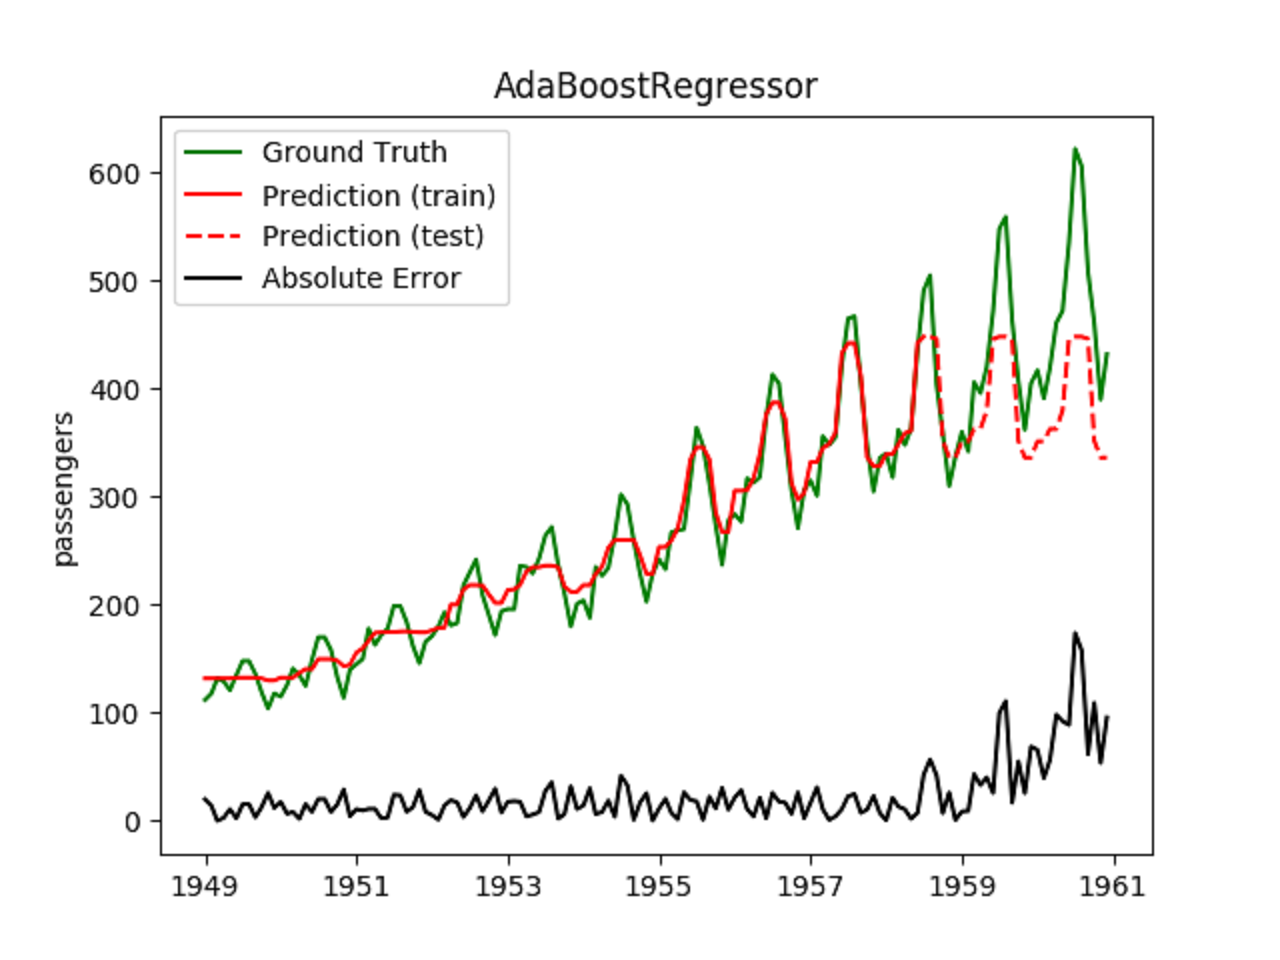

In [60]:
img = Image.open('AdaBoostRegressor.png')   
img

Referinte bibliografice : 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

https://www.datatechnotes.com/2019/07/regression-example-with.html

## AdaBoostRegressor GridSearchCV

In [8]:
def ABR_grid(X,y):
    parameter_grid={"n_estimators":[25,50]}
    scores_neg_mean_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = AdaBoostRegressor(), 
            param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_grid = cross_validate(estimator=GridSearchCV(estimator = AdaBoostRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = AdaBoostRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    AdaBoostRegressor_fit_time_gd=np.array([scores_neg_mean_absolute_error_grid["fit_time"].mean(),scores_neg_mean_squared_error_grid["fit_time"].mean(),
              scores_neg_median_absolute_error_grid["fit_time"].mean()])
    AdaBoostRegressor_score_time_gd=np.array([scores_neg_mean_absolute_error_grid["score_time"].mean(),scores_neg_mean_squared_error_grid["score_time"].mean()
                ,scores_neg_median_absolute_error_grid["score_time"].mean()])

    AdaBoostRegressor_grid=np.array([scores_neg_mean_absolute_error_grid["test_score"].mean(),scores_neg_mean_squared_error_grid["test_score"].mean(),
      scores_neg_median_absolute_error_grid["test_score"].mean(),scores_neg_mean_absolute_error_grid["train_score"].mean(),
      scores_neg_mean_squared_error_grid["train_score"].mean(),scores_neg_median_absolute_error_grid["train_score"].mean(),
          np.mean(AdaBoostRegressor_fit_time_gd),np.mean(AdaBoostRegressor_score_time_gd)])
    return AdaBoostRegressor_grid

## AdaBoostRegressor RandomizedSearchCV

In [9]:
def ABR_random(X,y):
    parameter_grid={"n_estimators":[25,50]}
    scores_neg_mean_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = AdaBoostRegressor(), 
            param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = AdaBoostRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = AdaBoostRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    AdaBoostRegressor_fit_time_random=np.array([scores_neg_mean_absolute_error_random["fit_time"].mean(),scores_neg_mean_squared_error_random["fit_time"].mean(),
              scores_neg_median_absolute_error_random["fit_time"].mean()])
    AdaBoostRegressor_score_time_random=np.array([scores_neg_mean_absolute_error_random["score_time"].mean(),scores_neg_mean_squared_error_random["score_time"].mean()
                ,scores_neg_median_absolute_error_random["score_time"].mean()])

    AdaBoostRegressor_random=np.array([scores_neg_mean_absolute_error_random["test_score"].mean(),scores_neg_mean_squared_error_random["test_score"].mean(),
      scores_neg_median_absolute_error_random["test_score"].mean(),scores_neg_mean_absolute_error_random["train_score"].mean(),
      scores_neg_mean_squared_error_random["train_score"].mean(),scores_neg_median_absolute_error_random["train_score"].mean(),
          np.mean(AdaBoostRegressor_fit_time_random),np.mean(AdaBoostRegressor_score_time_random)])
    return AdaBoostRegressor_random

# GradientBoostingRegressor

class sklearn.ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None,
alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1,
n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)



Un "GradientBoostingRegressor" construiește un model aditiv într-o etapă avansată, permite optimizarea funcțiilor de pierdere diferențiere arbitrare.
În fiecare etapă, un arbore de regresie se încadrează pe gradientul negativ al funcției de pierdere date.


Parametrii: 

   1.loss:{‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)
      Funcția de pierdere care trebuie optimizată.
      
   2.learning_rate:float, optional (default=0.1)
      Rata de învățare micșorează contribuția fiecărui arbore prin learning_rate.
      
   3.n_estimators:int (default=100)
      Numărul etapelor de stimulare care trebuie efectuate.
      
   4.subsample:float, optional (default=1.0)
      Fracția de eșantioane care urmează să fie utilizata pentru montarea individuala a invatatorilor.
      
   5.criterion:string, optional (default=”friedman_mse”)
      Funcția de a măsura calitatea unei împărțiri.
      
   6.min_samples_split:int, float, optional (default=2)
      Numărul minim de eșantioane necesar pentru a împărți un nod intern.
      
   7.min_samples_leaf:int, float, optional (default=1)
      Numărul minim de eșantioane necesar să fie la un nod frunze.
      
   8.min_weight_fraction_leaf:float, optional (default=0.)
      Fracția minimă ponderată din suma totală a greutăților (din toate eșantioanele de intrare) necesară pentru a fi la un nod frunză.
      Probele au o greutate egală atunci când nu este furnizat eșantion_weight.
      
   9.max_depth:integer, optional (default=3)
      Adâncimea maximă a estimatorilor de regresie individuală.
      
   10.min_impurity_decrease:float, optional (default=0.)
      Un nod va fi împărțit dacă această scindare induce o scădere a impurității mai mare sau egală cu această valoare.
      
   11.min_impurity_split:float, (default=1e-7)
       Prag pentru oprirea timpurie a creșterii pomilor.
       
   12.init:estimator or ‘zero’, optional (default=None)
      Un obiect estimator care este utilizat pentru a calcula predicțiile inițiale.
      
   13.random_state:int, RandomState instance or None, optional (default=None)
      Dacă este int, random_state este semința folosită de generatorul de numere aleatoare;
      Dacă este instanța RandomState, random_state este generatorul de numere aleatorii;
      Dacă este None, generatorul de numere aleatorii este instanța RandomState folosită de np.random.
      
   14.max_features:int, float, string or None, optional (default=None)
      Numărul de caracteristici care trebuie luate în considerare atunci când căutați cea mai bună divizare.
      
   15.alpha:float (default=0.9)
      Alfa-cuantica funcției de pierdere huber și funcția de pierdere cuantică.
      
   16.verbose:int, default: 0
       Se activeaza ieșirea verbose.
       
   17.max_leaf_nodes:int or None, optional (default=None)
      Se cultiva copaci cu max_leaf_nodes în cel mai bun mod.
      
   18.warm_start:bool, default: False
      Când este setat pe True, reutilizați soluția apelului anterior pentru a se potrivi și adăugați
      mai mulți estimatori la ansamblu, în caz contrar, ștergeți soluția anterioară.
      
   19.presort:deprecated, default=’deprecated’
      Acest parametru este învechit și va fi eliminat în v0.24.
      
   20.validation_fraction:float, optional, default 0.1
      Proporția datelor de formare pentru a fi rezervate ca valabilitate setată pentru oprirea timpurie.
      
   21.n_iter_no_change:int, default None
      n_iter_no_change este folosit pentru a decide dacă oprirea timpurie va fi folosită pentru a încheia
      antrenamentul atunci când scorul de validare nu se îmbunătățește.
      
   22.tol:float, optional, default 1e-4
      Toleranță pentru oprirea timpurie.
      
   23.ccp_alpha:non-negative float, optional (default=0.0)
      Parametrul de complexitate utilizat pentru tăierea minimă a costurilor-complexității.

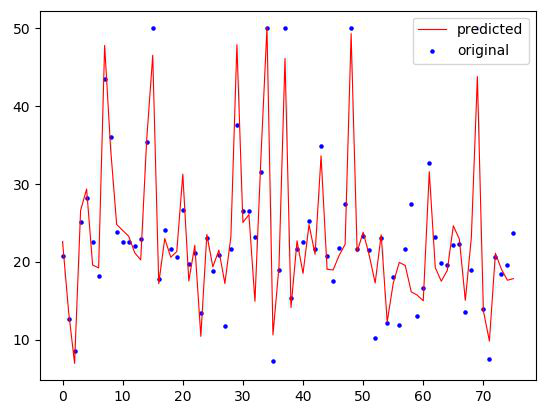

In [61]:
img = Image.open('GradientBoostingRegressor.JPG')   
img

Referinte bibliografice : 

J. Friedman, Greedy Function Approximation: A Gradient Boosting Machine, The Annals of Statistics, Vol. 29, No. 5, 2001.

Friedman, Stochastic Gradient Boosting, 1999

T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning Ed. 2, Springer, 2009.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

## GradientBoostingRegressor GridSearchCV

In [10]:
def GBR_grid(X,y):
    parameter_grid={"loss":["ls","lad"]}
    scores_neg_mean_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = GradientBoostingRegressor(), 
            param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_grid = cross_validate(estimator=GridSearchCV(estimator = GradientBoostingRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_grid = cross_validate(estimator=GridSearchCV(estimator = GradientBoostingRegressor(), 
        param_grid=parameter_grid,scoring='neg_mean_squared_error', cv=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    GradientBoostingRegressor_fit_time_gd=np.array([scores_neg_mean_absolute_error_grid["fit_time"].mean(),scores_neg_mean_squared_error_grid["fit_time"].mean(),
              scores_neg_median_absolute_error_grid["fit_time"].mean()])
    GradientBoostingRegressor_score_time_gd=np.array([scores_neg_mean_absolute_error_grid["score_time"].mean(),scores_neg_mean_squared_error_grid["score_time"].mean()
                ,scores_neg_median_absolute_error_grid["score_time"].mean()])

    GradientBoostingRegressor_grid=np.array([scores_neg_mean_absolute_error_grid["test_score"].mean(),scores_neg_mean_squared_error_grid["test_score"].mean(),
      scores_neg_median_absolute_error_grid["test_score"].mean(),scores_neg_mean_absolute_error_grid["train_score"].mean(),
      scores_neg_mean_squared_error_grid["train_score"].mean(),scores_neg_median_absolute_error_grid["train_score"].mean(),
          np.mean(GradientBoostingRegressor_fit_time_gd),np.mean(GradientBoostingRegressor_score_time_gd)])
    return GradientBoostingRegressor_grid

## GradientBoostingRegressor RandomizedSearchCV

In [11]:
def GBR_random(X,y):
    parameter_grid={"loss":["ls","lad"]}
    scores_neg_mean_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = GradientBoostingRegressor(), 
            param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_absolute_error',cv=5,return_train_score=True)

    scores_neg_mean_squared_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = GradientBoostingRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                             scoring='neg_mean_squared_error',cv=5,return_train_score=True)

    scores_neg_median_absolute_error_random = cross_validate(estimator=RandomizedSearchCV(estimator = GradientBoostingRegressor(), 
        param_distributions=parameter_grid,scoring='neg_mean_squared_error', n_iter=2,cv=3,n_jobs=3,return_train_score=True),X=X,y=y,
                          scoring='neg_median_absolute_error',cv=5,return_train_score=True)

    GradientBoostingRegressor_fit_time_random=np.array([scores_neg_mean_absolute_error_random["fit_time"].mean(),scores_neg_mean_squared_error_random["fit_time"].mean(),
              scores_neg_median_absolute_error_random["fit_time"].mean()])
    GradientBoostingRegressor_score_time_random=np.array([scores_neg_mean_absolute_error_random["score_time"].mean(),scores_neg_mean_squared_error_random["score_time"].mean()
                ,scores_neg_median_absolute_error_random["score_time"].mean()])

    GradientBoostingRegressor_random=np.array([scores_neg_mean_absolute_error_random["test_score"].mean(),scores_neg_mean_squared_error_random["test_score"].mean(),
      scores_neg_median_absolute_error_random["test_score"].mean(),scores_neg_mean_absolute_error_random["train_score"].mean(),
      scores_neg_mean_squared_error_random["train_score"].mean(),scores_neg_median_absolute_error_random["train_score"].mean(),
          np.mean(GradientBoostingRegressor_fit_time_random),np.mean(GradientBoostingRegressor_score_time_random)])
    return GradientBoostingRegressor_random

## Computer Hardware

In [12]:
names=["vendor name","Model Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]
data_machine=pd.read_csv("machine/machine.data",names=names)
data_machine=data_machine.drop(columns=["vendor name","Model Name","ERP"])
X_machine=data_machine.values[:,:-1]
y_machine=data_machine.values[:,-1]

In [13]:
BaggingRegressor_grid_machine=BR_grid(X_machine,y_machine)
BaggingRegressor_grid_machine=list(BaggingRegressor_grid_machine)
BaggingRegressor_grid_machine.insert(0,"GridSearchCV")
BaggingRegressor_grid_machine.insert(0,"BaggingRegressor")

BaggingRegressor_random_machine=BR_random(X_machine,y_machine)
BaggingRegressor_random_machine=list(BaggingRegressor_random_machine)
BaggingRegressor_random_machine.insert(0,"RandomizedSearchCV")
BaggingRegressor_random_machine.insert(0,"BaggingRegressor")

RandomForestRegressor_grid_machine=RFR_grid(X_machine,y_machine)
RandomForestRegressor_grid_machine=list(RandomForestRegressor_grid_machine)
RandomForestRegressor_grid_machine.insert(0,"GridSearchCV")
RandomForestRegressor_grid_machine.insert(0,"RandomForestRegressor")

RandomForestRegressor_random_machine=RFR_random(X_machine,y_machine)
RandomForestRegressor_random_machine=list(RandomForestRegressor_random_machine)
RandomForestRegressor_random_machine.insert(0,"RandomizedSearchCV")
RandomForestRegressor_random_machine.insert(0,"RandomForestRegressor")

DecisionTreeRegressor_grid_machine=DTR_grid(X_machine,y_machine)
DecisionTreeRegressor_grid_machine=list(DecisionTreeRegressor_grid_machine)
DecisionTreeRegressor_grid_machine.insert(0,"GridSearchCV")
DecisionTreeRegressor_grid_machine.insert(0,"DecisionTreeRegressor")

DecisionTreeRegressor_random_machine=DTR_random(X_machine,y_machine)
DecisionTreeRegressor_random_machine=list(DecisionTreeRegressor_random_machine)
DecisionTreeRegressor_random_machine.insert(0,"RandomizedSearchCV")
DecisionTreeRegressor_random_machine.insert(0,"DecisionTreeRegressor")

AdaBoostRegressor_grid_machine=ABR_grid(X_machine,y_machine)
AdaBoostRegressor_grid_machine=list(AdaBoostRegressor_grid_machine)
AdaBoostRegressor_grid_machine.insert(0,"GridSearchCV")
AdaBoostRegressor_grid_machine.insert(0,"AdaBoostRegressor")

AdaBoostRegressor_random_machine=ABR_random(X_machine,y_machine)
AdaBoostRegressor_random_machine=list(AdaBoostRegressor_random_machine)
AdaBoostRegressor_random_machine.insert(0,"RandomizedSearchCV")
AdaBoostRegressor_random_machine.insert(0,"AdaBoostRegressor")

GradientBoostingRegressor_grid_machine=GBR_grid(X_machine,y_machine)
GradientBoostingRegressor_grid_machine=list(GradientBoostingRegressor_grid_machine)
GradientBoostingRegressor_grid_machine.insert(0,"GridSearchCV")
GradientBoostingRegressor_grid_machine.insert(0,"GradientBoostingRegressor")

GradientBoostingRegressor_random_machine=GBR_random(X_machine,y_machine)
GradientBoostingRegressor_random_machine=list(GradientBoostingRegressor_random_machine)
GradientBoostingRegressor_random_machine.insert(0,"RandomizedSearchCV")
GradientBoostingRegressor_random_machine.insert(0,"GradientBoostingRegressor")

In [14]:
machine=pd.DataFrame(data=[BaggingRegressor_grid_machine,BaggingRegressor_random_machine,RandomForestRegressor_grid_machine,
                      RandomForestRegressor_random_machine,DecisionTreeRegressor_grid_machine,DecisionTreeRegressor_random_machine,
                      AdaBoostRegressor_grid_machine,AdaBoostRegressor_random_machine,GradientBoostingRegressor_grid_machine
                     ,GradientBoostingRegressor_random_machine],columns=["Model_name","Search_strategy",
                "test_neg_mean_absolute_error","test_neg_mean_squared_error","test_neg_median_absolute_error",
                "train_neg_mean_absolute_error","train_neg_mean_squared_error","train_neg_median_absolute_error","fit_time","score_time"])
machine

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_neg_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,-35.296681,-7095.628585,-19.543333,-11.646363,-539.058685,-5.040000,0.401898,0.004457
1,BaggingRegressor,RandomizedSearchCV,-36.440657,-6337.694438,-17.700000,-11.746564,-597.252254,-4.671667,0.320717,0.002216
2,RandomForestRegressor,GridSearchCV,-33.956586,-7165.912449,-20.373053,-16.379228,-845.540225,-13.242584,1.766436,0.012790
3,RandomForestRegressor,RandomizedSearchCV,-34.635175,-7552.646630,-17.315174,-16.590918,-799.515713,-10.376277,1.092306,0.015914
4,DecisionTreeRegressor,GridSearchCV,-40.476591,-9849.845629,-19.340323,-21.746056,-687.247160,-13.817140,0.018633,0.000066
5,DecisionTreeRegressor,RandomizedSearchCV,-46.501970,-11582.097483,-19.386821,-20.504937,-687.247160,-12.155474,0.025022,0.002092
6,AdaBoostRegressor,GridSearchCV,-44.207735,-8964.503982,-30.633684,-26.917877,-1200.819674,-24.638910,0.658941,0.003529
7,AdaBoostRegressor,RandomizedSearchCV,-45.202718,-8713.156388,-30.948314,-26.898639,-1012.401713,-27.462046,0.363541,0.004432
8,GradientBoostingRegressor,GridSearchCV,-29.498298,-4068.302948,-15.423740,-11.471139,-219.825135,-5.954918,0.926335,0.000475
9,GradientBoostingRegressor,RandomizedSearchCV,-34.059260,-4327.260468,-15.473488,-11.892048,-219.825135,-5.954918,0.472884,0.000684


In [15]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_min(data, color='yellow'):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [16]:
machine1=pd.DataFrame(data=[BaggingRegressor_grid_machine,BaggingRegressor_random_machine,RandomForestRegressor_grid_machine,
                       RandomForestRegressor_random_machine,DecisionTreeRegressor_grid_machine,
                     DecisionTreeRegressor_random_machine,AdaBoostRegressor_grid_machine,AdaBoostRegressor_random_machine,
                       GradientBoostingRegressor_grid_machine
                     ,GradientBoostingRegressor_random_machine],columns=["Model_name","Search_strategy",
                "test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
                "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
                                            "fit_time","score_time"])

machine1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]]=machine1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]].abs()

machine1.style.apply(highlight_max, color='red', axis=0,subset=["test_mean_absolute_error","test_mean_squared_error",
    "test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
    "fit_time","score_time"]).apply(highlight_min, color='lime', axis=0,subset=["test_mean_absolute_error",
    "test_mean_squared_error","test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error",
    "train_median_absolute_error","fit_time","score_time"])

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_median_absolute_error,train_mean_absolute_error,train_mean_squared_error,train_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,35.296681,7095.628585,19.543333,11.646363,539.058685,5.040000,0.401898,0.004457
1,BaggingRegressor,RandomizedSearchCV,36.440657,6337.694438,17.700000,11.746564,597.252254,4.671667,0.320717,0.002216
2,RandomForestRegressor,GridSearchCV,33.956586,7165.912449,20.373053,16.379228,845.540225,13.242584,1.766436,0.012790
3,RandomForestRegressor,RandomizedSearchCV,34.635175,7552.646630,17.315174,16.590918,799.515713,10.376277,1.092306,0.015914
4,DecisionTreeRegressor,GridSearchCV,40.476591,9849.845629,19.340323,21.746056,687.247160,13.817140,0.018633,0.000066
5,DecisionTreeRegressor,RandomizedSearchCV,46.501970,11582.097483,19.386821,20.504937,687.247160,12.155474,0.025022,0.002092
6,AdaBoostRegressor,GridSearchCV,44.207735,8964.503982,30.633684,26.917877,1200.819674,24.638910,0.658941,0.003529
7,AdaBoostRegressor,RandomizedSearchCV,45.202718,8713.156388,30.948314,26.898639,1012.401713,27.462046,0.363541,0.004432
8,GradientBoostingRegressor,GridSearchCV,29.498298,4068.302948,15.423740,11.471139,219.825135,5.954918,0.926335,0.000475
9,GradientBoostingRegressor,RandomizedSearchCV,34.059260,4327.260468,15.473488,11.892048,219.825135,5.954918,0.472884,0.000684


In [89]:
pdf=canvas.Canvas("Computer.pdf")
pdf.setTitle("Computer-Hardware")
pdf.drawString(220,800,"Computer-Hardware")
pdf.drawInlineImage("computer1.png",20,550,width=550,height=200)
pdf.drawInlineImage("computer2.png",20,300,width=550,height=200)

pdf.save()

## Housing 

In [17]:
names=["CRIM",'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data_housing=pd.read_csv("housing/housing.data",names=names,sep='\s+')
X_housing = data_housing.values[:, :-1]
y_housing = data_housing.values[:, -1]

In [18]:
BaggingRegressor_grid_housing=BR_grid(X_housing,y_housing)
BaggingRegressor_grid_housing=list(BaggingRegressor_grid_housing)
BaggingRegressor_grid_housing.insert(0,"GridSearchCV")
BaggingRegressor_grid_housing.insert(0,"BaggingRegressor")

BaggingRegressor_random_housing=BR_random(X_housing,y_housing)
BaggingRegressor_random_housing=list(BaggingRegressor_random_housing)
BaggingRegressor_random_housing.insert(0,"RandomizedSearchCV")
BaggingRegressor_random_housing.insert(0,"BaggingRegressor")

RandomForestRegressor_grid_housing=RFR_grid(X_housing,y_housing)
RandomForestRegressor_grid_housing=list(RandomForestRegressor_grid_housing)
RandomForestRegressor_grid_housing.insert(0,"GridSearchCV")
RandomForestRegressor_grid_housing.insert(0,"RandomForestRegressor")

RandomForestRegressor_random_housing=RFR_random(X_housing,y_housing)
RandomForestRegressor_random_housing=list(RandomForestRegressor_random_housing)
RandomForestRegressor_random_housing.insert(0,"RandomizedSearchCV")
RandomForestRegressor_random_housing.insert(0,"RandomForestRegressor")

DecisionTreeRegressor_grid_housing=DTR_grid(X_housing,y_housing)
DecisionTreeRegressor_grid_housing=list(DecisionTreeRegressor_grid_housing)
DecisionTreeRegressor_grid_housing.insert(0,"GridSearchCV")
DecisionTreeRegressor_grid_housing.insert(0,"DecisionTreeRegressor")

DecisionTreeRegressor_random_housing=DTR_random(X_housing,y_housing)
DecisionTreeRegressor_random_housing=list(DecisionTreeRegressor_random_housing)
DecisionTreeRegressor_random_housing.insert(0,"RandomizedSearchCV")
DecisionTreeRegressor_random_housing.insert(0,"DecisionTreeRegressor")

AdaBoostRegressor_grid_housing=ABR_grid(X_housing,y_housing)
AdaBoostRegressor_grid_housing=list(AdaBoostRegressor_grid_housing)
AdaBoostRegressor_grid_housing.insert(0,"GridSearchCV")
AdaBoostRegressor_grid_housing.insert(0,"AdaBoostRegressor")

AdaBoostRegressor_random_housing=ABR_random(X_housing,y_housing)
AdaBoostRegressor_random_housing=list(AdaBoostRegressor_random_housing)
AdaBoostRegressor_random_housing.insert(0,"RandomizedSearchCV")
AdaBoostRegressor_random_housing.insert(0,"AdaBoostRegressor")

GradientBoostingRegressor_grid_housing=GBR_grid(X_housing,y_housing)
GradientBoostingRegressor_grid_housing=list(GradientBoostingRegressor_grid_housing)
GradientBoostingRegressor_grid_housing.insert(0,"GridSearchCV")
GradientBoostingRegressor_grid_housing.insert(0,"GradientBoostingRegressor")

GradientBoostingRegressor_random_housing=GBR_random(X_housing,y_housing)
GradientBoostingRegressor_random_housing=list(GradientBoostingRegressor_random_housing)
GradientBoostingRegressor_random_housing.insert(0,"RandomizedSearchCV")
GradientBoostingRegressor_random_housing.insert(0,"GradientBoostingRegressor")

In [19]:
housing=pd.DataFrame(data=[BaggingRegressor_grid_housing,BaggingRegressor_random_housing,RandomForestRegressor_grid_housing,
                      RandomForestRegressor_random_housing,DecisionTreeRegressor_grid_housing,DecisionTreeRegressor_random_housing,
                      AdaBoostRegressor_grid_housing,AdaBoostRegressor_random_housing,GradientBoostingRegressor_grid_housing
                     ,GradientBoostingRegressor_random_housing],columns=["Model_name","Search_strategy",
                "test_neg_mean_absolute_error","test_neg_mean_squared_error","test_neg_median_absolute_error",
                "train_neg_mean_absolute_error","train_neg_mean_squared_error","train_neg_median_absolute_error","fit_time","score_time"])
housing

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_neg_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,-3.017608,-22.832989,-2.087000,-0.888411,-1.790550,-0.574000,0.527753,0.003392
1,BaggingRegressor,RandomizedSearchCV,-3.050585,-21.969820,-2.146000,-0.886690,-1.832921,-0.567500,0.317604,0.003781
2,RandomForestRegressor,GridSearchCV,-3.104537,-22.983880,-2.140685,-1.668300,-4.757803,-1.329186,2.891671,0.017594
3,RandomForestRegressor,RandomizedSearchCV,-3.155663,-23.182595,-2.146608,-1.667752,-4.771330,-1.321358,1.406980,0.014036
4,DecisionTreeRegressor,GridSearchCV,-3.673065,-38.663728,-2.430079,-2.034145,-10.866399,-1.776904,0.028032,0.000643
5,DecisionTreeRegressor,RandomizedSearchCV,-3.725971,-35.058298,-2.637982,-2.034145,-7.682560,-1.744204,0.040748,0.001165
6,AdaBoostRegressor,GridSearchCV,-3.243728,-22.630798,-2.583813,-2.233757,-7.583764,-1.952728,1.002404,0.008774
7,AdaBoostRegressor,RandomizedSearchCV,-3.453889,-23.555887,-2.701981,-2.272190,-7.321247,-1.945889,0.500801,0.007047
8,GradientBoostingRegressor,GridSearchCV,-2.968676,-18.466993,-2.290229,-1.031166,-1.744593,-0.806094,1.768008,0.001341
9,GradientBoostingRegressor,RandomizedSearchCV,-2.969771,-18.477014,-2.291867,-1.031166,-1.744593,-0.865301,0.860031,0.001510


In [20]:
housing1=pd.DataFrame(data=[BaggingRegressor_grid_housing,BaggingRegressor_random_housing,RandomForestRegressor_grid_housing,
                       RandomForestRegressor_random_housing,DecisionTreeRegressor_grid_housing,
                     DecisionTreeRegressor_random_housing,AdaBoostRegressor_grid_housing,AdaBoostRegressor_random_housing,
                       GradientBoostingRegressor_grid_housing
                     ,GradientBoostingRegressor_random_housing],columns=["Model_name","Search_strategy",
                "test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
                "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
                                            "fit_time","score_time"])

housing1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]]=housing1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]].abs()

housing1.style.apply(highlight_max, color='red', axis=0,subset=["test_mean_absolute_error","test_mean_squared_error",
    "test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
    "fit_time","score_time"]).apply(highlight_min, color='lime', axis=0,subset=["test_mean_absolute_error",
    "test_mean_squared_error","test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error",
    "train_median_absolute_error","fit_time","score_time"])

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_median_absolute_error,train_mean_absolute_error,train_mean_squared_error,train_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,3.017608,22.832989,2.087000,0.888411,1.790550,0.574000,0.527753,0.003392
1,BaggingRegressor,RandomizedSearchCV,3.050585,21.969820,2.146000,0.886690,1.832921,0.567500,0.317604,0.003781
2,RandomForestRegressor,GridSearchCV,3.104537,22.983880,2.140685,1.668300,4.757803,1.329186,2.891671,0.017594
3,RandomForestRegressor,RandomizedSearchCV,3.155663,23.182595,2.146608,1.667752,4.771330,1.321358,1.406980,0.014036
4,DecisionTreeRegressor,GridSearchCV,3.673065,38.663728,2.430079,2.034145,10.866399,1.776904,0.028032,0.000643
5,DecisionTreeRegressor,RandomizedSearchCV,3.725971,35.058298,2.637982,2.034145,7.682560,1.744204,0.040748,0.001165
6,AdaBoostRegressor,GridSearchCV,3.243728,22.630798,2.583813,2.233757,7.583764,1.952728,1.002404,0.008774
7,AdaBoostRegressor,RandomizedSearchCV,3.453889,23.555887,2.701981,2.272190,7.321247,1.945889,0.500801,0.007047
8,GradientBoostingRegressor,GridSearchCV,2.968676,18.466993,2.290229,1.031166,1.744593,0.806094,1.768008,0.001341
9,GradientBoostingRegressor,RandomizedSearchCV,2.969771,18.477014,2.291867,1.031166,1.744593,0.865301,0.860031,0.001510


In [91]:
pdf=canvas.Canvas("Housing.pdf")
pdf.setTitle("Boston-Housing")
pdf.drawString(220,800,"Boston-Housing")
pdf.drawInlineImage("housing1.png",20,550,width=550,height=200)
pdf.drawInlineImage("housing2.png",20,300,width=550,height=200)

pdf.save()

## Wisconsin Breast Cancer

In [21]:
names=['Lymph node status',
       'Mean radius','Mean texture','Mean perimeter','Mean area','Mean smoothness','Mean compactness',
       'Mean concavity','Mean concave points','Mean symmetry','Mean fractal dimension',
      'SE radius','SE texture','SE perimeter','SE area','SE smoothness','SE compactness',
       'SE concavity','SE concave points','SE symmetry','SE fractal dimension',
      'Worst radius','Worst texture','Worst perimeter','Worst area','Worst smoothness','Worst compactness',
       'Worst concavity','Worst concave points','Worst symmetry','Worst fractal dimension','Tumor size','Time']
data_wbc=pd.read_csv("wbc/r_wpbc.data",names=names)

X_wbc=data_wbc.values[:,:-1]
y_wbc=data_wbc.values[:,-1]

In [22]:
BaggingRegressor_grid_wbc=BR_grid(X_wbc,y_wbc)
BaggingRegressor_grid_wbc=list(BaggingRegressor_grid_wbc)
BaggingRegressor_grid_wbc.insert(0,"GridSearchCV")
BaggingRegressor_grid_wbc.insert(0,"BaggingRegressor")

BaggingRegressor_random_wbc=BR_random(X_wbc,y_wbc)
BaggingRegressor_random_wbc=list(BaggingRegressor_random_wbc)
BaggingRegressor_random_wbc.insert(0,"RandomizedSearchCV")
BaggingRegressor_random_wbc.insert(0,"BaggingRegressor")

RandomForestRegressor_grid_wbc=RFR_grid(X_wbc,y_wbc)
RandomForestRegressor_grid_wbc=list(RandomForestRegressor_grid_wbc)
RandomForestRegressor_grid_wbc.insert(0,"GridSearchCV")
RandomForestRegressor_grid_wbc.insert(0,"RandomForestRegressor")

RandomForestRegressor_random_wbc=RFR_random(X_wbc,y_wbc)
RandomForestRegressor_random_wbc=list(RandomForestRegressor_random_wbc)
RandomForestRegressor_random_wbc.insert(0,"RandomizedSearchCV")
RandomForestRegressor_random_wbc.insert(0,"RandomForestRegressor")

DecisionTreeRegressor_grid_wbc=DTR_grid(X_wbc,y_wbc)
DecisionTreeRegressor_grid_wbc=list(DecisionTreeRegressor_grid_wbc)
DecisionTreeRegressor_grid_wbc.insert(0,"GridSearchCV")
DecisionTreeRegressor_grid_wbc.insert(0,"DecisionTreeRegressor")

DecisionTreeRegressor_random_wbc=DTR_random(X_wbc,y_wbc)
DecisionTreeRegressor_random_wbc=list(DecisionTreeRegressor_random_wbc)
DecisionTreeRegressor_random_wbc.insert(0,"RandomizedSearchCV")
DecisionTreeRegressor_random_wbc.insert(0,"DecisionTreeRegressor")

AdaBoostRegressor_grid_wbc=ABR_grid(X_wbc,y_wbc)
AdaBoostRegressor_grid_wbc=list(AdaBoostRegressor_grid_wbc)
AdaBoostRegressor_grid_wbc.insert(0,"GridSearchCV")
AdaBoostRegressor_grid_wbc.insert(0,"AdaBoostRegressor")

AdaBoostRegressor_random_wbc=ABR_random(X_wbc,y_wbc)
AdaBoostRegressor_random_wbc=list(AdaBoostRegressor_random_wbc)
AdaBoostRegressor_random_wbc.insert(0,"RandomizedSearchCV")
AdaBoostRegressor_random_wbc.insert(0,"AdaBoostRegressor")

GradientBoostingRegressor_grid_wbc=GBR_grid(X_wbc,y_wbc)
GradientBoostingRegressor_grid_wbc=list(GradientBoostingRegressor_grid_wbc)
GradientBoostingRegressor_grid_wbc.insert(0,"GridSearchCV")
GradientBoostingRegressor_grid_wbc.insert(0,"GradientBoostingRegressor")

GradientBoostingRegressor_random_wbc=GBR_random(X_wbc,y_wbc)
GradientBoostingRegressor_random_wbc=list(GradientBoostingRegressor_random_wbc)
GradientBoostingRegressor_random_wbc.insert(0,"RandomizedSearchCV")
GradientBoostingRegressor_random_wbc.insert(0,"GradientBoostingRegressor")

In [23]:
wbc=pd.DataFrame(data=[BaggingRegressor_grid_wbc,BaggingRegressor_random_wbc,RandomForestRegressor_grid_wbc,
                      RandomForestRegressor_random_wbc,DecisionTreeRegressor_grid_wbc,DecisionTreeRegressor_random_wbc,
                      AdaBoostRegressor_grid_wbc,AdaBoostRegressor_random_wbc,GradientBoostingRegressor_grid_wbc
                     ,GradientBoostingRegressor_random_wbc],columns=["Model_name","Search_strategy",
                "test_neg_mean_absolute_error","test_neg_mean_squared_error","test_neg_median_absolute_error",
                "train_neg_mean_absolute_error","train_neg_mean_squared_error","train_neg_median_absolute_error","fit_time","score_time"])
wbc

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_neg_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,-31.521012,-1307.812156,-31.665000,-10.562194,-183.230065,-8.595000,0.599709,0.007765
1,BaggingRegressor,RandomizedSearchCV,-31.347274,-1360.883452,-28.895000,-10.733370,-184.844976,-9.140000,0.325366,0.003469
2,RandomForestRegressor,GridSearchCV,-31.048527,-1300.135928,-29.261639,-17.005809,-406.681980,-16.253930,2.695108,0.013191
3,RandomForestRegressor,RandomizedSearchCV,-30.688821,-1283.317343,-30.073621,-15.989258,-466.088202,-15.778257,1.463319,0.018090
4,DecisionTreeRegressor,GridSearchCV,-31.530016,-1500.658368,-27.305001,-21.637644,-688.063415,-19.029763,0.028809,0.000749
5,DecisionTreeRegressor,RandomizedSearchCV,-31.530016,-1508.652919,-27.305001,-21.637644,-688.063415,-19.029763,0.033907,0.000154
6,AdaBoostRegressor,GridSearchCV,-29.628394,-1336.705807,-28.596306,-16.667454,-370.115519,-17.979514,0.918445,0.006789
7,AdaBoostRegressor,RandomizedSearchCV,-30.511467,-1286.446669,-29.773209,-17.135010,-347.762144,-18.586088,0.542065,0.005527
8,GradientBoostingRegressor,GridSearchCV,-31.525632,-1327.648186,-30.156896,-7.918338,-224.058587,-4.471966,1.866077,0.001926
9,GradientBoostingRegressor,RandomizedSearchCV,-31.510104,-1427.167904,-30.395174,-6.989953,-147.199601,-4.317277,1.003642,0.001353


In [24]:
wbc1=pd.DataFrame(data=[BaggingRegressor_grid_wbc,BaggingRegressor_random_wbc,RandomForestRegressor_grid_wbc,
                       RandomForestRegressor_random_wbc,DecisionTreeRegressor_grid_wbc,
                     DecisionTreeRegressor_random_wbc,AdaBoostRegressor_grid_wbc,AdaBoostRegressor_random_wbc,
                       GradientBoostingRegressor_grid_wbc
                     ,GradientBoostingRegressor_random_wbc],columns=["Model_name","Search_strategy",
                "test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
                "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
                                            "fit_time","score_time"])

wbc1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]]=wbc1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]].abs()

wbc1.style.apply(highlight_max, color='red', axis=0,subset=["test_mean_absolute_error","test_mean_squared_error",
    "test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
    "fit_time","score_time"]).apply(highlight_min, color='lime', axis=0,subset=["test_mean_absolute_error",
    "test_mean_squared_error","test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error",
    "train_median_absolute_error","fit_time","score_time"])

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_median_absolute_error,train_mean_absolute_error,train_mean_squared_error,train_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,31.521012,1307.812156,31.665000,10.562194,183.230065,8.595000,0.599709,0.007765
1,BaggingRegressor,RandomizedSearchCV,31.347274,1360.883452,28.895000,10.733370,184.844976,9.140000,0.325366,0.003469
2,RandomForestRegressor,GridSearchCV,31.048527,1300.135928,29.261639,17.005809,406.681980,16.253930,2.695108,0.013191
3,RandomForestRegressor,RandomizedSearchCV,30.688821,1283.317343,30.073621,15.989258,466.088202,15.778257,1.463319,0.018090
4,DecisionTreeRegressor,GridSearchCV,31.530016,1500.658368,27.305001,21.637644,688.063415,19.029763,0.028809,0.000749
5,DecisionTreeRegressor,RandomizedSearchCV,31.530016,1508.652919,27.305001,21.637644,688.063415,19.029763,0.033907,0.000154
6,AdaBoostRegressor,GridSearchCV,29.628394,1336.705807,28.596306,16.667454,370.115519,17.979514,0.918445,0.006789
7,AdaBoostRegressor,RandomizedSearchCV,30.511467,1286.446669,29.773209,17.135010,347.762144,18.586088,0.542065,0.005527
8,GradientBoostingRegressor,GridSearchCV,31.525632,1327.648186,30.156896,7.918338,224.058587,4.471966,1.866077,0.001926
9,GradientBoostingRegressor,RandomizedSearchCV,31.510104,1427.167904,30.395174,6.989953,147.199601,4.317277,1.003642,0.001353


In [93]:
pdf=canvas.Canvas("WisconsinBreastCancer.pdf")
pdf.setTitle("WisconsinBreastCancer")
pdf.drawString(220,800,"Wisconsin Breast Cancer")
pdf.drawInlineImage("wbc1.png",20,550,width=550,height=200)
pdf.drawInlineImage("wbc2.png",20,300,width=550,height=200)

pdf.save()

## Communities

In [25]:
data_communities=pd.read_csv("communities/communities.data",header=None)
data_communities=data_communities.drop(columns=[0,1,2,3,4])
data_communities=data_communities.replace("?",np.nan)
data_communities=data_communities.dropna(axis=1)
X_communities=data_communities.values[:,:-1]
y_communities=data_communities.values[:,-1]

In [26]:
BaggingRegressor_grid_communities=BR_grid(X_communities,y_communities)
BaggingRegressor_grid_communities=list(BaggingRegressor_grid_communities)
BaggingRegressor_grid_communities.insert(0,"GridSearchCV")
BaggingRegressor_grid_communities.insert(0,"BaggingRegressor")

BaggingRegressor_random_communities=BR_random(X_communities,y_communities)
BaggingRegressor_random_communities=list(BaggingRegressor_random_communities)
BaggingRegressor_random_communities.insert(0,"RandomizedSearchCV")
BaggingRegressor_random_communities.insert(0,"BaggingRegressor")

RandomForestRegressor_grid_communities=RFR_grid(X_communities,y_communities)
RandomForestRegressor_grid_communities=list(RandomForestRegressor_grid_communities)
RandomForestRegressor_grid_communities.insert(0,"GridSearchCV")
RandomForestRegressor_grid_communities.insert(0,"RandomForestRegressor")

RandomForestRegressor_random_communities=RFR_random(X_communities,y_communities)
RandomForestRegressor_random_communities=list(RandomForestRegressor_random_communities)
RandomForestRegressor_random_communities.insert(0,"RandomizedSearchCV")
RandomForestRegressor_random_communities.insert(0,"RandomForestRegressor")

DecisionTreeRegressor_grid_communities=DTR_grid(X_communities,y_communities)
DecisionTreeRegressor_grid_communities=list(DecisionTreeRegressor_grid_communities)
DecisionTreeRegressor_grid_communities.insert(0,"GridSearchCV")
DecisionTreeRegressor_grid_communities.insert(0,"DecisionTreeRegressor")

DecisionTreeRegressor_random_communities=DTR_random(X_communities,y_communities)
DecisionTreeRegressor_random_communities=list(DecisionTreeRegressor_random_communities)
DecisionTreeRegressor_random_communities.insert(0,"RandomizedSearchCV")
DecisionTreeRegressor_random_communities.insert(0,"DecisionTreeRegressor")

AdaBoostRegressor_grid_communities=ABR_grid(X_communities,y_communities)
AdaBoostRegressor_grid_communities=list(AdaBoostRegressor_grid_communities)
AdaBoostRegressor_grid_communities.insert(0,"GridSearchCV")
AdaBoostRegressor_grid_communities.insert(0,"AdaBoostRegressor")

AdaBoostRegressor_random_communities=ABR_random(X_communities,y_communities)
AdaBoostRegressor_random_communities=list(AdaBoostRegressor_random_communities)
AdaBoostRegressor_random_communities.insert(0,"RandomizedSearchCV")
AdaBoostRegressor_random_communities.insert(0,"AdaBoostRegressor")

GradientBoostingRegressor_grid_communities=GBR_grid(X_communities,y_communities)
GradientBoostingRegressor_grid_communities=list(GradientBoostingRegressor_grid_communities)
GradientBoostingRegressor_grid_communities.insert(0,"GridSearchCV")
GradientBoostingRegressor_grid_communities.insert(0,"GradientBoostingRegressor")

GradientBoostingRegressor_random_communities=GBR_random(X_communities,y_communities)
GradientBoostingRegressor_random_communities=list(GradientBoostingRegressor_random_communities)
GradientBoostingRegressor_random_communities.insert(0,"RandomizedSearchCV")
GradientBoostingRegressor_random_communities.insert(0,"GradientBoostingRegressor")

In [27]:
communities=pd.DataFrame(data=[BaggingRegressor_grid_communities,BaggingRegressor_random_communities,RandomForestRegressor_grid_communities,
                      RandomForestRegressor_random_communities,DecisionTreeRegressor_grid_communities,DecisionTreeRegressor_random_communities,
                      AdaBoostRegressor_grid_communities,AdaBoostRegressor_random_communities,GradientBoostingRegressor_grid_communities
                     ,GradientBoostingRegressor_random_communities],columns=["Model_name","Search_strategy",
                "test_neg_mean_absolute_error","test_neg_mean_squared_error","test_neg_median_absolute_error",
                "train_neg_mean_absolute_error","train_neg_mean_squared_error","train_neg_median_absolute_error","fit_time","score_time"])
communities

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_median_absolute_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_neg_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,-0.096961,-0.019733,-0.060650,-0.037921,-0.003082,-0.022600,9.398215,0.011252
1,BaggingRegressor,RandomizedSearchCV,-0.096572,-0.019841,-0.063100,-0.037403,-0.003207,-0.022700,5.447953,0.011704
2,RandomForestRegressor,GridSearchCV,-0.095759,-0.019566,-0.061987,-0.078375,-0.012017,-0.054514,20.953922,0.017893
3,RandomForestRegressor,RandomizedSearchCV,-0.095804,-0.019638,-0.062022,-0.078415,-0.011981,-0.054108,11.320751,0.017095
4,DecisionTreeRegressor,GridSearchCV,-0.105407,-0.023835,-0.065695,-0.100404,-0.021110,-0.063919,0.287788,0.000066
5,DecisionTreeRegressor,RandomizedSearchCV,-0.105407,-0.023835,-0.065695,-0.100404,-0.021110,-0.063919,0.189946,0.001309
6,AdaBoostRegressor,GridSearchCV,-0.129465,-0.024746,-0.111570,-0.120555,-0.019542,-0.109661,6.668938,0.007803
7,AdaBoostRegressor,RandomizedSearchCV,-0.126931,-0.025135,-0.118211,-0.119838,-0.019895,-0.114777,3.441791,0.011643
8,GradientBoostingRegressor,GridSearchCV,-0.092643,-0.019493,-0.057719,-0.064915,-0.009084,-0.044463,21.307459,0.002796
9,GradientBoostingRegressor,RandomizedSearchCV,-0.092643,-0.019421,-0.055203,-0.064234,-0.009113,-0.039847,10.982196,0.002354


In [28]:
communities1=pd.DataFrame(data=[BaggingRegressor_grid_communities,BaggingRegressor_random_communities,RandomForestRegressor_grid_communities,
                       RandomForestRegressor_random_communities,DecisionTreeRegressor_grid_communities,
                     DecisionTreeRegressor_random_communities,AdaBoostRegressor_grid_communities,AdaBoostRegressor_random_communities,
                       GradientBoostingRegressor_grid_communities
                     ,GradientBoostingRegressor_random_communities],columns=["Model_name","Search_strategy",
                "test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
                "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
                                            "fit_time","score_time"])

communities1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]]=communities1[["test_mean_absolute_error","test_mean_squared_error","test_median_absolute_error",
    "train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error"]].abs()

communities1.style.apply(highlight_max, color='red', axis=0,subset=["test_mean_absolute_error","test_mean_squared_error",
    "test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error","train_median_absolute_error",
    "fit_time","score_time"]).apply(highlight_min, color='lime', axis=0,subset=["test_mean_absolute_error",
    "test_mean_squared_error","test_median_absolute_error","train_mean_absolute_error","train_mean_squared_error",
    "train_median_absolute_error","fit_time","score_time"])

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_median_absolute_error,train_mean_absolute_error,train_mean_squared_error,train_median_absolute_error,fit_time,score_time
0,BaggingRegressor,GridSearchCV,0.096961,0.019733,0.060650,0.037921,0.003082,0.022600,9.398215,0.011252
1,BaggingRegressor,RandomizedSearchCV,0.096572,0.019841,0.063100,0.037403,0.003207,0.022700,5.447953,0.011704
2,RandomForestRegressor,GridSearchCV,0.095759,0.019566,0.061987,0.078375,0.012017,0.054514,20.953922,0.017893
3,RandomForestRegressor,RandomizedSearchCV,0.095804,0.019638,0.062022,0.078415,0.011981,0.054108,11.320751,0.017095
4,DecisionTreeRegressor,GridSearchCV,0.105407,0.023835,0.065695,0.100404,0.021110,0.063919,0.287788,0.000066
5,DecisionTreeRegressor,RandomizedSearchCV,0.105407,0.023835,0.065695,0.100404,0.021110,0.063919,0.189946,0.001309
6,AdaBoostRegressor,GridSearchCV,0.129465,0.024746,0.111570,0.120555,0.019542,0.109661,6.668938,0.007803
7,AdaBoostRegressor,RandomizedSearchCV,0.126931,0.025135,0.118211,0.119838,0.019895,0.114777,3.441791,0.011643
8,GradientBoostingRegressor,GridSearchCV,0.092643,0.019493,0.057719,0.064915,0.009084,0.044463,21.307459,0.002796
9,GradientBoostingRegressor,RandomizedSearchCV,0.092643,0.019421,0.055203,0.064234,0.009113,0.039847,10.982196,0.002354


In [94]:
pdf=canvas.Canvas("CommunitiesandCrime.pdf")
pdf.setTitle("Communities and Crime")
pdf.drawString(220,800,"Communities and Crime")
pdf.drawInlineImage("communities1.png",20,550,width=550,height=200)
pdf.drawInlineImage("communities2.png",20,300,width=550,height=200)

pdf.save()